In [297]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

In [298]:
df = pd.read_csv('laptop_data.csv')

In [299]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [301]:
df.isnull().sum().sum()

0

In [302]:
def Classcounter(dataframe):
    obj_cols = dataframe.select_dtypes('object')
    for i in obj_cols:
        print(f"=========={i}==========")
        print(df[i].value_counts())
        print("========================")
        

In [303]:
Classcounter(df)

==========Company==========
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
==========TypeName==========
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64
==========ScreenResolution==========
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16

In [304]:
obj_columns = df.select_dtypes('object').columns

In [305]:
ceOrd = ce.OrdinalEncoder(cols = obj_columns)

In [306]:
data1 = ceOrd.fit_transform(df)
data1.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,1,1,13.3,1,1,1,1,1,1,1,71378.6832
1,1,1,1,13.3,2,2,1,2,2,1,2,47895.5232
2,2,2,2,15.6,3,3,1,3,3,2,3,30636.0000
3,3,1,1,15.4,4,4,2,4,4,1,4,135195.3360
4,4,1,1,13.3,1,5,1,3,5,1,1,96095.8080


In [307]:
data1['Cpu'].value_counts()

3     190
26    146
13    134
8      73
9      72
     ... 
87      1
88      1
39      1
90      1
81      1
Name: Cpu, Length: 118, dtype: int64

In [308]:
data1.drop(columns="Unnamed: 0", inplace=True)

In [309]:
data1

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,1,13.3,1,1,1,1,1,1,1,71378.6832
1,1,1,13.3,2,2,1,2,2,1,2,47895.5232
2,2,2,15.6,3,3,1,3,3,2,3,30636.0000
3,1,1,15.4,4,4,2,4,4,1,4,135195.3360
4,1,1,13.3,1,5,1,3,5,1,1,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,6,5,14.0,8,45,3,1,10,3,36,33992.6400
1299,6,5,13.3,31,45,2,4,10,3,7,79866.7200
1300,6,2,14.0,5,86,4,11,21,3,47,12201.1200
1301,2,2,15.6,5,45,6,7,102,3,96,40705.9200


In [310]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Company,1303.0,4.907905,2.751755,1.00,3.00,5.00,6.0000,19.00
TypeName,1303.0,2.551036,1.299402,1.00,2.00,2.00,4.0000,6.00
Inches,1303.0,15.017191,1.426304,10.10,14.00,15.60,15.6000,18.40
ScreenResolution,1303.0,6.669225,6.254610,1.00,3.00,5.00,6.0000,40.00
Cpu,1303.0,29.072909,26.297834,1.00,9.00,24.00,45.0000,118.00
Ram,1303.0,2.114351,1.393413,1.00,1.00,2.00,3.0000,9.00
Memory,1303.0,6.493477,5.305252,1.00,3.00,5.00,8.0000,39.00
Gpu,1303.0,21.960092,22.133375,1.00,9.00,15.00,30.0000,110.00
OpSys,1303.0,3.370683,1.422866,1.00,3.00,3.00,3.0000,9.00
Weight,1303.0,51.437452,45.019766,1.00,13.00,36.00,78.5000,179.00


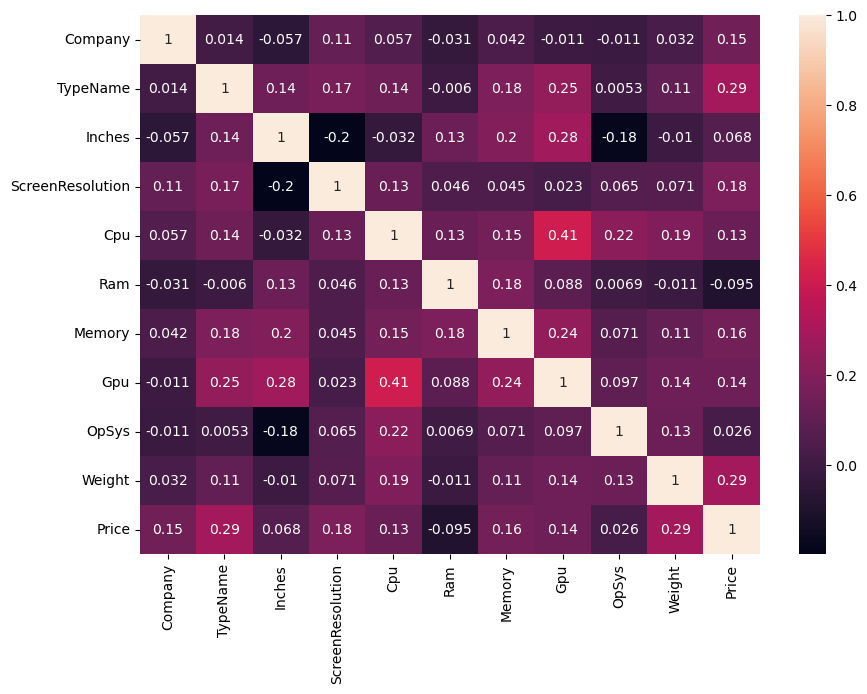

In [311]:
plt.figure(figsize=(10, 7))
sns.heatmap(data = data1.corr(), annot = True)
plt.show()

<AxesSubplot:>

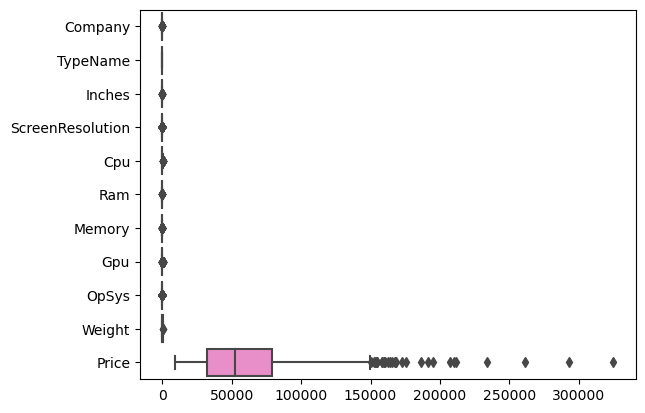

In [312]:
sns.boxplot(data = data1, orient='h')

In [313]:
features = data1[['TypeName','Weight']]


In [314]:
features

,TypeName,Weight
0,1,1
1,1,2
2,2,3
3,1,4
4,1,1
...,...,...
1298,5,36
1299,5,7
1300,2,47
1301,2,96


In [315]:
target = data1['Price']

In [316]:
target

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

In [317]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)

In [318]:
features2 = data1.iloc[:, :-1]
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(features2, target, test_size=0.2)

In [319]:
linReg = LinearRegression()

In [320]:
linReg.fit(X_train2, Y_train2)

LinearRegression()

In [321]:
linReg.score(X_test2, Y_test2)

0.16700812990027858

In [322]:
print(features2.shape)
print(target.shape)

(1303, 10)
(1303,)


In [323]:
randomReg = RandomForestRegressor()

In [324]:
randomReg.fit(X_train2, Y_train2)

RandomForestRegressor()

In [325]:
randomReg.score(X_test2, Y_test2)

0.839965328972864

In [328]:
randomReg.feature_names_in_

array(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'], dtype=object)

In [331]:
randomReg.predict(np.array([0, 1, 15.6, 2, 3, 
                          4, 5, 6, 2, 3]).reshape(1, -1))

C:\Users\yadne\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([50178.741696])

In [332]:
linReg.predict(np.array([0, 1, 15.6, 2, 3, 
                          4, 5, 6, 2, 3]).reshape(1, -1))

C:\Users\yadne\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22477.24330294])